# 📘 Marco Teórico: Redes Neuronales Recurrentes (RNN)

## 1️⃣ Introducción

Las **Redes Neuronales Recurrentes (RNN, Recurrent Neural Networks)** son un tipo de red neuronal artificial diseñada para **procesar datos secuenciales**.  
A diferencia de las redes neuronales tradicionales (feed-forward), las RNN pueden **recordar información previa** gracias a sus **conexiones recurrentes**, lo que les permite capturar **dependencias temporales** entre los datos.

Estas redes son ampliamente utilizadas en tareas donde el **orden de los datos importa**, tales como:

- Predicción de series temporales (finanzas, clima, energía).  
- Reconocimiento de voz y procesamiento del lenguaje natural (NLP).  
- Análisis de secuencias genéticas o biológicas.  
- Control de procesos y modelado dinámico.

---

## 2️⃣ Fundamento Teórico

Una RNN tiene una estructura similar a una red neuronal tradicional, pero con una diferencia clave:  
**las neuronas no solo reciben información de la entrada actual, sino también de su propio estado anterior.**

Matemáticamente, el funcionamiento básico de una RNN se describe con la ecuación:

$$
h_t = f(W_h \cdot h_{t-1} + W_x \cdot x_t + b)
$$

donde:

| Símbolo | Descripción | Interpretación |
|----------|--------------|----------------|
| $$x_t$$ | Entrada en el tiempo *t* | Dato actual (ejemplo: precio, palabra, sensor). |
| $$h_t$$ | Estado oculto en el tiempo *t* | Estado actual |
| $$h_{t-1}$$ | Estado oculto anterior | Memoria de lo que ocurrió antes. |
| $$W_x, W_h$$ | Pesos | Controlan la influencia de la entrada y de la memoria. |
| $$b$$ | Sesgo | Ajuste adicional del modelo. |
| $$f$$ | Función de activación | Suele ser **tanh** o **ReLU**, para introducir no linealidad. |

El nuevo estado oculto h_t representa una **combinación entre la información actual y la memoria previa**, lo que permite modelar patrones temporales.

---

## 3️⃣ Arquitectura básica de una RNN

### 3.1. Flujo de información

```text
 x₁ → (h₁) → y₁
       ↓
 x₂ → (h₂) → y₂
       ↓
 x₃ → (h₃) → y₃
       ↓
 ... → ...



4️⃣ Funcionamiento paso a paso

	1.	Entrada actual: el modelo recibe un dato de la secuencia (x_t).
	2.	Memoria: se combina con la información almacenada (h_{t-1}).
	3.	Actualización: la función de activación calcula el nuevo estado (h_t).
	4.	Salida: el modelo produce una predicción (y_t).
	5.	Repetición: el estado (h_t) se usa en el siguiente paso (t+1).

⸻

5️⃣ Función de activación

La activación más común en las RNN es la tangente hiperbólica:

$$
\tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}
$$

Esta función permite mantener los valores de activación entre -1 y 1,
lo que ayuda a estabilizar el entrenamiento.

⸻

6️⃣ Problemas principales

Aunque las RNN son poderosas, presentan limitaciones:

|Problema	|Descripción	|Consecuencia|
|---|---|---|
|Desvanecimiento del gradiente|	Los gradientes se vuelven muy pequeños al retropropagarse a través del tiempo.|	La red olvida información lejana.|
|Explosión del gradiente	|Los gradientes crecen descontroladamente.|	Entrenamiento inestable.|
|Dependencias largas|	Difícil recordar eventos muy lejanos en la secuencia.|	Bajo rendimiento en secuencias largas.|


⸻

7️⃣ Soluciones: LSTM y GRU

Para superar los problemas de las RNN clásicas, se desarrollaron variantes:

	•	LSTM (Long Short-Term Memory): introduce puertas de control (olvido, entrada, salida) que regulan qué información se guarda o se borra.
	•	GRU (Gated Recurrent Unit): versión más ligera de la LSTM, con menos parámetros y desempeño similar.

Estas arquitecturas permiten recordar información por más tiempo y mejorar la estabilidad del entrenamiento.

⸻

8️⃣ Aplicaciones prácticas

Las RNN y sus variantes se usan ampliamente en:

	•	Finanzas: predicción de precios, rendimientos o riesgo.
	•	Lenguaje natural: traducción automática, chatbots, generación de texto.
	•	Visión computacional: descripción automática de imágenes.
	•	Control y robótica: secuencias de acciones o señales.
	•	Salud: análisis de series temporales médicas (ECG, EEG).

⸻

9️⃣ Ejemplo conceptual

Imaginemos una RNN que predice el precio del día siguiente de una acción.

|Día|	Entrada (x_t) (Precio actual)|	Estado (h_t) (Memoria)	|Salida (y_t) (Predicción)|
|---|---|---|---|
|1|	100	|—	|—|
|2|	102	|Aprende tendencia|	103|
|3|	105	|Recuerda patrón creciente|	107|
|4|	108	|Ajusta memoria	|110|

👉 Así, la RNN combina el pasado con el presente para predecir el futuro.

⸻

🔟 Conclusión

Las Redes Neuronales Recurrentes (RNN) representan un avance clave en el aprendizaje profundo, al permitir que los modelos recuerden el contexto temporal de los datos.
Sin embargo, su desempeño depende de una buena gestión de los gradientes y del tipo de arquitectura empleada.
Modelos como LSTM y GRU han extendido las capacidades de las RNN tradicionales, haciendo posible el aprendizaje de dependencias largas en contextos reales como finanzas, lenguaje y control de sistemas dinámicos.

⸻

En síntesis:
Las RNN son redes con memoria que pueden aprender de secuencias.
Funcionan con la regla básica:
$$
h_t = f(W_h h_{t-1} + W_x x_t + b)
$$
y constituyen la base de arquitecturas más avanzadas como LSTM, GRU y Transformers.



In [12]:
import pandas as pd
import numpy as np
# 1) Datos: X de -50 a 50 (°C), Y en °F
X = np.linspace(-50, 50, 101).astype(np.float32).reshape(-1, 1)   # °C
Y = (9/5)*X + 32                                                  # °F (tabla exacta)
# Genera un dataframe con X y Y
df = pd.DataFrame({"X": X.flatten(), "Y": Y.flatten()})
df.head()
#Guarda en un csv
df.to_csv("celsius_a_fahrenheit.csv", index=False)

In [13]:
df = pd.read_csv("celsius_a_fahrenheit.csv")
df.head()

,X,Y
0,-50.0,-58.000000
1,-49.0,-56.199997
2,-48.0,-54.399994
3,-47.0,-52.600000
4,-46.0,-50.799995


In [14]:
X = df["X"].values
Y = df["Y"].values

# 1 Layer + Keras

=== RESULTADOS DEL MODELO ===
Peso aprendido (esperado ≈ 1.8): 1.800001
Sesgo aprendido (esperado ≈ 32): 31.999889
MSE : 5508.001465
RMSE: 74.215912
MAE : 0.000111
R²  : 1.000000


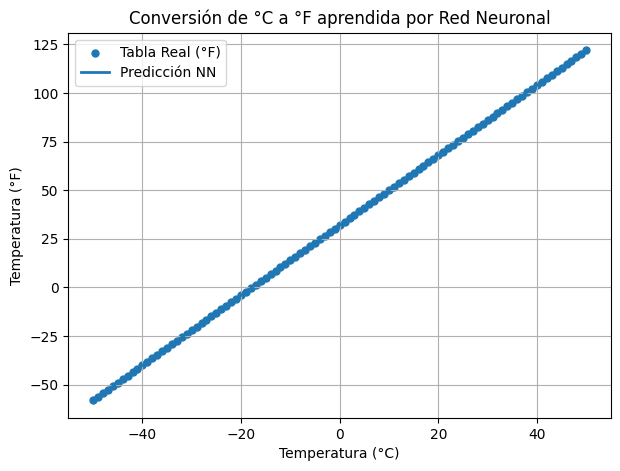


=== PRUEBAS DE PREDICCIÓN ===
C = -40° → Predicho: -40.000°F | Real: -40.000°F
C =   0° → Predicho:  32.000°F | Real:  32.000°F
C =  25° → Predicho:  77.000°F | Real:  77.000°F
C =  37° → Predicho:  98.600°F | Real:  98.600°F
C =  50° → Predicho: 122.000°F | Real: 122.000°F


In [15]:
# ============================================================
# 🔥 Red Neuronal que aprende °C → °F (robusta y sin warnings)
# ============================================================

# !pip install tensorflow numpy scikit-learn matplotlib --quiet

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Asegurar float32 global
tf.keras.backend.set_floatx('float32')
np.random.seed(42)
tf.random.set_seed(42)

# ------------------------------------------------------------
# 1) Datos exactos: °C de -50 a 50 y °F por fórmula
# ------------------------------------------------------------
#X = np.linspace(-50, 50, 101).astype(np.float32).reshape(-1, 1)  # (101,1) float32
#Y = (9.0/5.0)*X + 32.0                                           # (101,1) float32

# ------------------------------------------------------------
# 2) Modelo: una neurona lineal (y = w*x + b)
#    - Definimos Input para evitar warnings y problemas de forma
# ------------------------------------------------------------
model = Sequential([
    tf.keras.Input(shape=(1,), dtype=tf.float32),
    Dense(1, activation="linear", dtype=tf.float32)
])

# Optimizador y pérdida
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss="mse")

# EarlyStopping para garantizar convergencia estable
es = EarlyStopping(monitor="loss", patience=200, min_delta=1e-8,
                   restore_best_weights=True, verbose=0)

# ------------------------------------------------------------
# 3) Entrenamiento
# ------------------------------------------------------------
history = model.fit(X, Y, epochs=5000, batch_size=32, verbose=0, callbacks=[es])

# ------------------------------------------------------------
# 4) Evaluación general
# ------------------------------------------------------------
Y_pred = model.predict(X, verbose=0).astype(np.float32)

mse = np.mean((Y - Y_pred)**2, dtype=np.float32)
rmse = np.sqrt(mse, dtype=np.float32)
mae = mean_absolute_error(Y, Y_pred)
r2  = r2_score(Y, Y_pred)

w, b = model.layers[-1].get_weights()  # capa Dense
w = float(w.flatten()[0])
b = float(b.flatten()[0])

print("=== RESULTADOS DEL MODELO ===")
print(f"Peso aprendido (esperado ≈ 1.8): {w:.6f}")
print(f"Sesgo aprendido (esperado ≈ 32): {b:.6f}")
print(f"MSE : {float(mse):.6f}")
print(f"RMSE: {float(rmse):.6f}")
print(f"MAE : {mae:.6f}")
print(f"R²  : {r2:.6f}")

# ------------------------------------------------------------
# 5) Gráfico comparativo
# ------------------------------------------------------------
plt.figure(figsize=(7,5))
plt.scatter(X, Y, label="Tabla Real (°F)", s=25)
plt.plot(X, Y_pred, linewidth=2, label="Predicción NN")
plt.title("Conversión de °C a °F aprendida por Red Neuronal")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Temperatura (°F)")
plt.grid(True); plt.legend(); plt.show()

# ------------------------------------------------------------
# 6) Predicción puntual (forma y dtype correctos)
#    Usamos tensores tf para evitar shape/dtype desconocidos.
# ------------------------------------------------------------
def predict_f(c):
    x = tf.constant([[c]], dtype=tf.float32)   # (1,1) float32
    y = model(x, training=False)               # llamada directa (eager)
    return float(y.numpy()[0, 0])

print("\n=== PRUEBAS DE PREDICCIÓN ===")
for c in [-40, 0, 25, 37, 50]:
    pred = predict_f(c)
    real = (9.0/5.0)*c + 32.0
    print(f"C = {c:>3}° → Predicho: {pred:7.3f}°F | Real: {real:7.3f}°F")